<a href="https://colab.research.google.com/github/nhjung74/paper/blob/main/factor_rl_portfolio_20250627.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 딥러닝 처리 환경 requirements
g_drive = False
mac_gpu = False
# colab
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False
# print(IN_COLAB)

if IN_COLAB:
    print('colab......')
    g_drive = True
    # google drive setting
    #from google.colab import drive
    #drive.mount('/content/drive')
    #import os
    #try:
    #    import transformers, emoji, soynlp, pytorch_lightning
    #except:
    #    ! pip install -U -q transformers emoji soynlp pytorch-lightning snoop wandb sklearn seaborn pandas numpy
    # restart runtime
    #os.kill(os.getpid(), 9)
elif IN_COLAB==False:
    print('not colab')
    g_drive = False
    #import os
    #try:
    #    import transformers, emoji, soynlp, pytorch_lightning
    #except:
    #    ! pip install -U -q transformers emoji soynlp pytorch-lightning snoop wandb sklearn seaborn pandas numpy
    #    ! pip install -q torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

print('g_drive=',g_drive)

colab......
g_drive= True


In [3]:
import platform

platform.system()

'Linux'

In [4]:
os_type = platform.system()

In [5]:
# Os 종류를 확인한다.
if os_type == 'Darwin':
    mac_gpu = True
else:
    mac_gpu = False
print('mac_gpu=',mac_gpu)

mac_gpu= False


In [6]:
if g_drive == True:
  !pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [7]:
if g_drive == True:
  !pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [PyPortfolioOpt]


In [8]:
if g_drive == True:
  !pip install shimmy>=0.2.1

In [9]:
if g_drive == True:
  !pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 121.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-n

In [10]:
# 필요한 패키지 불러오기
import os
import math
import time
import datetime

In [11]:
# 기본 디렉토리 설정
if g_drive==False:
    from google.colab import drive
    drive.mount('/content/gdrive')
    base_dir = '/content/gdrive/My Drive/Colab Notebooks/aSSIST/factor_Project'
    data_dir = os.path.join(base_dir, 'data')

    # 디렉토리 생성
    os.makedirs(data_dir, exist_ok=True)

    # 경로 이동
    os.chdir(data_dir)

    # 모델 저장 디렉토리 설정
    MODEL_DIR = data_dir  # 또는 MODEL_DIR = os.getcwd()

    # 경로 확인
    print(f"현재 작업 경로: {os.getcwd()}")
    print(f"모델 저장 경로: {MODEL_DIR}")

In [12]:
start_date ='2006-12-01'
end_date ='2023-08-18'
start_date2 ='01/12/2006'
end_date2 ='08/08/2023'

In [13]:
!ls

'=0.2.1'   sample_data


In [14]:
!pwd

/content


# 첫 번째 실험 (PPO + Crypto + Sharpe 보상)

다음 6가지 실험을 한 번에 실행하고 결과를 비교

Crypto_PPO_sharpe

Crypto_PPO_beta

Crypto_SAC_sharpe

Crypto_SAC_beta

Crypto_TD3_sharpe

Crypto_TD3_beta

# 최종소스 20250616

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'BTC-USD', 'ETH-USD', 'BNB-USD', 'SOL-USD']
▶ Running: Mixed_EqualWeight_equal_weights

[기술통계 요약: Price]
          count        mean         std        min         25%         50%  \
Ticker                                                                       
AAPL     1665.0    159.6826     35.3475    81.6295    133.6089    156.4945   
AMZN     1665.0    150.5351     30.5135    81.8200    128.6340    156.4495   
BNB-USD  1665.0    334.5481    182.3187    15.1853    239.7069    310.6347   
BTC-USD  1665.0  38987.5909  20112.5706  9045.3906  22978.1172  36276.8047   
ETH-USD  1665.0   2154.8572   1050.1261   222.9598   1552.0895   1961.2808   
GOOGL    1665.0    123.3184     29.2873    67.7209    100.6330    122.9824   
MSFT     1665.0    300.1123     75.1289   178.4626    239.2287    284.3375   
SOL-USD  1665.0     70.9860     67.8793     0.5706     19.4937     36.1909   

                75%          max  
Ticker                            
AAPL      

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WA

▶ Running: Mixed_PPO_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WA

▶ Running: Mixed_PPO_multi_hybrid


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WA

▶ Running: Mixed_SAC_sharpe


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


▶ Running: Mixed_SAC_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.28GB > 10.11GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


▶ Running: Mixed_SAC_mulit_hybrid


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.28GB > 10.10GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


▶ Running: Mixed_TD3_sharpe


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.28GB > 10.11GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


▶ Running: Mixed_TD3_multi_beta


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


▶ Running: Mixed_TD3_mulit_hybrid


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/buffers.py:242: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 10.28GB > 10.05GB
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


                                 Sharpe Ratio  Sortino Ratio  \
Mixed_EqualWeight_equal_weights      1.524986       2.066581   
Mixed_MeanVariance_mvp               0.823882       1.041895   
Mixed_PPO_sharpe                     0.277964       0.376668   
Mixed_PPO_multi_beta                 0.218651       0.291933   
Mixed_PPO_multi_hybrid               0.406676       0.558182   
Mixed_SAC_sharpe                     3.328918       5.123364   
Mixed_SAC_multi_beta                 0.605613       0.831188   
Mixed_SAC_mulit_hybrid               3.878521       6.314405   
Mixed_TD3_sharpe                     1.342258       1.885404   
Mixed_TD3_multi_beta                 1.067002       1.468003   
Mixed_TD3_mulit_hybrid             179.849134     520.238183   

                                 Cumulative Return  Annualized Return  \
Mixed_EqualWeight_equal_weights       1.680014e+01           0.546966   
Mixed_MeanVariance_mvp                1.852103e+00           0.178989   
Mixed_PPO_sh

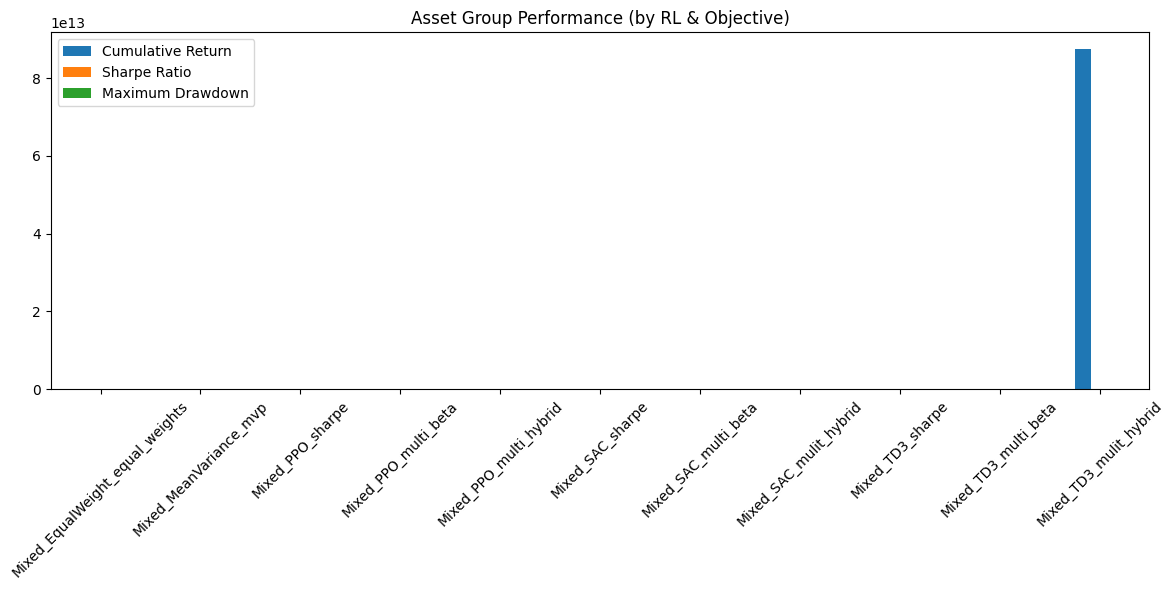

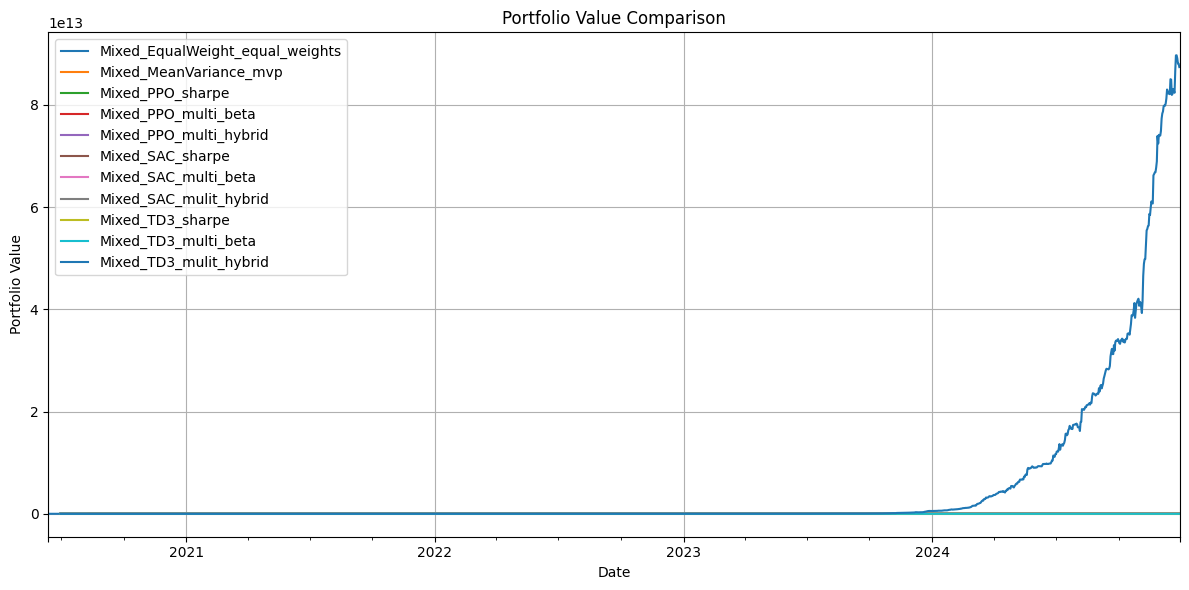


🔎 [Mixed_PPO_sharpe vs Mixed_PPO_multi_beta]
▶ t-test p-value: 0.9814 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.8940 → 유의미하지 않음

🔎 [Mixed_PPO_sharpe vs Mixed_PPO_multi_hybrid]
▶ t-test p-value: 0.8376 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.9070 → 유의미하지 않음

🔎 [Mixed_SAC_sharpe vs Mixed_SAC_multi_beta]
▶ t-test p-value: 0.0174 → 유의미함
▶ Mann–Whitney U-test p-value: 0.0146 → 유의미함

🔎 [Mixed_SAC_sharpe vs Mixed_SAC_mulit_hybrid]
▶ t-test p-value: 0.0663 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.8057 → 유의미하지 않음

🔎 [Mixed_TD3_sharpe vs Mixed_TD3_multi_beta]
▶ t-test p-value: 0.3830 → 유의미하지 않음
▶ Mann–Whitney U-test p-value: 0.3574 → 유의미하지 않음

🔎 [Mixed_TD3_sharpe vs Mixed_TD3_mulit_hybrid]
▶ t-test p-value: 0.0000 → 유의미함
▶ Mann–Whitney U-test p-value: 0.0000 → 유의미함
   Group Algorithm   CompareWith           t_p           u_p
0  Mixed       PPO    multi_beta  9.813653e-01  8.939777e-01
1  Mixed       PPO  multi_hybrid  8.376279e-01  9.069913e-01
2  Mixed       SAC    multi_beta  1.73556

In [15]:
import gym
import numpy as np
import pandas as pd
import yfinance as yf
import shap

import matplotlib.pyplot as plt
from gym import spaces
from stable_baselines3 import PPO, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv
import torch
import random
from sklearn.linear_model import LinearRegression  # 추가
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from scipy.stats import ttest_ind, mannwhitneyu

from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier




# Seed 설정
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

show_summary = True

# 자산군 설정
stock_assets = ["AAPL", "MSFT", "GOOGL", "AMZN"]
crypto_assets = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = stock_assets + crypto_assets #["BTC-USD", "ETH-USD", "AAPL", "MSFT", "GOOGL", "AMZN", "BNB-USD", "SOL-USD"]

print(mixed_assets)

def save_model(model, save_path="models", filename="ppo_model.zip"):
    import os
    os.makedirs(save_path, exist_ok=True)
    model.save(os.path.join(save_path, filename))

def load_model(model_class, env, save_path="models", filename="ppo_model.zip"):
    from stable_baselines3.common.vec_env import DummyVecEnv
    return model_class.load(os.path.join(save_path, filename), env=env)


def compare_strategies(series1, series2, label1="A", label2="B"):
    """
    두 포트폴리오 가치 시계열에 대해 t-test와 Mann–Whitney U-test 수행
    """
    returns1 = series1.pct_change().dropna()
    returns2 = series2.pct_change().dropna()

    # 길이 맞추기
    min_len = min(len(returns1), len(returns2))
    returns1 = returns1[-min_len:]
    returns2 = returns2[-min_len:]

    # 평균차이 검정 (t-test)
    t_stat, t_p = ttest_ind(returns1, returns2, equal_var=False)

    # 비모수 검정 (Mann–Whitney U-test)
    u_stat, u_p = mannwhitneyu(returns1, returns2, alternative='two-sided')

    print(f"\n🔎 [{label1} vs {label2}]")
    print(f"▶ t-test p-value: {t_p:.4f} → {'유의미함' if t_p < 0.05 else '유의미하지 않음'}")
    print(f"▶ Mann–Whitney U-test p-value: {u_p:.4f} → {'유의미함' if u_p < 0.05 else '유의미하지 않음'}")

    return {
        "t_p": t_p,
        "u_p": u_p
    }


# 시간가변 베타 계산 함수 (추가)
def compute_rolling_beta(price_data: pd.DataFrame, volume_data: pd.DataFrame, window: int = 60) -> pd.DataFrame:
    """
    기술적 요인(Momentum, Volatility, MA Deviation, Volume Z-score, Sharpe, MDD)을 이용해
    각 자산별 60일 롤링 회귀를 수행하고, 시간가변적 베타 계수를 계산합니다.
    """
    log_return = np.log(price_data / price_data.shift(1))
    momentum = price_data.pct_change(20)
    volatility = log_return.rolling(20).std()
    ma = price_data.rolling(20).mean()
    ma_deviation = (price_data - ma) / ma
    volume_z = (volume_data - volume_data.rolling(20).mean()) / volume_data.rolling(20).std()

    beta_data = {}
    for asset in price_data.columns:
        asset_df = pd.DataFrame({
            "y": log_return[asset],
            "momentum": momentum[asset],
            "volatility": volatility[asset],
            "ma_dev": ma_deviation[asset],
            "volume_z": volume_z[asset]
        }).dropna()

        betas = []
        index_list = []
        for i in range(window, len(asset_df)):
            y = asset_df["y"].iloc[i - window:i].values
            X = asset_df[["momentum", "volatility", "ma_dev", "volume_z"]].iloc[i - window:i].values
            price_window = price_data[asset].iloc[i - window:i]
            returns = price_window.pct_change().dropna()
            if np.any(np.isnan(X)) or np.any(np.isnan(y)) or returns.empty:
                betas.append([np.nan] * 6)
                index_list.append(asset_df.index[i])
                continue
            reg = LinearRegression().fit(X, y)
            sharpe = returns.mean() / (returns.std() + 1e-6)
            cumulative = (1 + returns).cumprod()
            peak = cumulative.cummax()
            drawdown = (cumulative - peak) / peak
            mdd = drawdown.min()
            beta_mdd = 1 - abs(mdd)  # MDD는 작을수록 좋음
            betas.append(list(reg.coef_) + [sharpe, beta_mdd])
            index_list.append(asset_df.index[i])

        beta_df = pd.DataFrame(betas, columns=["beta_mom", "beta_vol", "beta_ma", "beta_volz", "beta_sharpe", "beta_mdd"], index=index_list)
        beta_data[asset] = beta_df

    beta_panel = pd.concat(beta_data, axis=1)
    beta_panel.index.name = "Date"
    return beta_panel

# 데이터 수집 함수 (수정: 거래량 데이터 추가 및 베타 통합)
def fetch_data(assets, start="2019-01-01", end="2024-12-31"):
    # 전체 데이터 다운로드 (종가 + 거래량)
    data = yf.download(assets, start=start, end=end, auto_adjust=True, progress=False, threads=False)
    price = data["Close"].ffill().bfill().dropna()
    volume = data["Volume"].ffill().bfill().dropna()

    # 기존 팩터 계산
    returns = price.pct_change().dropna()
    momentum = price.pct_change(20).dropna()
    volatility = returns.rolling(20).std().dropna()
    factors = pd.concat([momentum.add_suffix("_mom"), volatility.add_suffix("_vol")], axis=1).dropna()

    # 시간가변 베타 계산 (추가)
    beta_df = compute_rolling_beta(price, volume)

    # 팩터와 베타 통합
    combined_factors = pd.concat([factors, beta_df], axis=1).dropna()

    # 인덱스 정렬
    idx = price.index.intersection(combined_factors.index).intersection(returns.index)

    if show_summary:
        df_price = None
        df_returns = None
        df_factors = None

        # 기술통계 요약 출력
        print("\n[기술통계 요약: Price]")
        print(price.loc[idx].describe().T.round(4))
        df_price = price.loc[idx].describe().T.round(4)
        df_price.to_excel('df_price.xlsx')

        print("\n[기술통계 요약: Returns]")
        print(returns.loc[idx].describe().T.round(4))
        df_returns = returns.loc[idx].describe().T.round(4)
        df_returns.to_excel('df_returns.xlsx')

        print("\n[기술통계 요약: Factors (Momentum, Volatility, Beta 등)]")
        print(combined_factors.loc[idx].describe().T.round(4))
        df_factors = combined_factors.loc[idx].describe().T.round(4)
        df_factors.to_excel('df_factors.xlsx')


    return price.loc[idx], returns.loc[idx], combined_factors.loc[idx]

# 강화학습 환경 (보상 계산 로직 수정: 베타 팩터 활용)
class PPOPortfolioEnv(gym.Env):
    def __init__(self, returns, factors, price, objective="sharpe"):
        super().__init__()
        self.returns = returns
        self.factors = factors
        self.price = price
        self.assets = returns.columns.tolist()
        self.n_assets = len(self.assets)
        self.window = 20
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        self.objective = objective
        self.action_space = spaces.Box(low=0, high=1, shape=(self.n_assets,), dtype=np.float32)

        # 상태 공간 크기 자동 조정 (베타 팩터 추가로 인해)
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf,
            shape=(self.window, factors.shape[1]),
            dtype=np.float32
        )

    def reset(self):
        self.current_step = self.window
        self.cash = 1.0
        self.asset_quantity = np.zeros(self.n_assets)
        self.portfolio_value = [1.0]
        self.portfolio_returns = []
        return self.factors.iloc[self.current_step - self.window:self.current_step].values

    def step(self, action):
        action = np.clip(action, 0, 1)
        action = action / (np.sum(action) + 1e-8)  # 포트폴리오 가중치 정규화

        # 현재 가격 및 포트폴리오 가치
        price_today = self.price.iloc[self.current_step].values
        total_value = self.cash + np.sum(self.asset_quantity * price_today)

        # 목표 자산 가치 계산
        desired_value = action * total_value
        current_value = self.asset_quantity * price_today
        trade_value = desired_value - current_value

        # 거래 비용 (0.1% 수수료)
        cost = np.sum(np.abs(trade_value)) * 0.001
        net_trade_value = trade_value - np.sign(trade_value) * cost / self.n_assets

        # 자산 및 현금 업데이트
        self.asset_quantity += net_trade_value / price_today
        self.cash = total_value - np.sum(self.asset_quantity * price_today) - cost

        # 다음 스텝의 포트폴리오 가치 계산
        price_next = self.price.iloc[self.current_step + 1].values
        port_value_next = self.cash + np.sum(self.asset_quantity * price_next)
        port_return = (port_value_next - total_value) / total_value

        self.portfolio_returns.append(port_return)
        self.portfolio_value.append(port_value_next)
        self.current_step += 1

        # 종료 조건 확인
        done = self.current_step >= len(self.returns) - 2

        # 관측값 업데이트
        obs = self.factors.iloc[self.current_step - self.window:self.current_step].values

        # 보상 계산 (베타 팩터 활용 방식 수정)
        if self.objective == "sharpe":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                reward = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                reward = 0
        elif self.objective == "beta":
            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                # 각 자산별 beta_mom 값 선택
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "multi_beta":
            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma", "beta_volz", "beta_sharpe", "beta_mdd"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 6.0)  # 단순 평균
            reward = np.dot(action, np.array(beta_scores))

        elif self.objective == "hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            # 베타 팩터 선택 (4개 팩터 중 모멘텀 베타 사용)
            beta_scores = []
            for asset in self.assets:
                beta_mom = self.factors.iloc[self.current_step - 1].get((asset, 'beta_mom'), 0)
                beta_scores.append(beta_mom)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta

        elif self.objective == "multi_hybrid":
            if len(self.portfolio_returns) > 1:
                returns_window = np.array(self.portfolio_returns[-20:])
                sharpe = np.mean(returns_window) / (np.std(returns_window) + 1e-6)
            else:
                sharpe = 0

            beta_scores = []
            for asset in self.assets:
                beta_total = 0
                for factor_name in ["beta_mom", "beta_vol", "beta_ma", "beta_volz", "beta_sharpe", "beta_mdd"]:
                    beta_val = self.factors.iloc[self.current_step - 1].get((asset, factor_name), 0)
                    beta_total += beta_val
                beta_scores.append(beta_total / 6.0)
            beta = np.dot(action, np.array(beta_scores))
            reward = 0.5 * sharpe + 0.5 * beta
        else:
            reward = port_return

        return obs, reward, done, {"portfolio_value": port_value_next}

def equal_weight_backtest(price, transaction_cost=0.001):
    """
    매일 리밸런싱 + 수수료 반영 + 자산 보유량 기반 백테스트
    """
    returns = price.pct_change().dropna()
    n_assets = returns.shape[1]
    weights = np.ones(n_assets) / n_assets
    portfolio_values = []
    asset_quantity = np.zeros(n_assets)
    cash = 1.0  # 초기 자본

    for t in range(1, len(returns)):
        prices_today = price.iloc[t - 1].values
        total_value = cash + np.sum(asset_quantity * prices_today)

        desired_value = total_value * weights
        current_value = asset_quantity * prices_today
        trade_value = desired_value - current_value

        turnover = np.sum(np.abs(trade_value))
        cost = turnover * transaction_cost

        # 거래 반영
        net_trade_value = trade_value - np.sign(trade_value) * cost / n_assets
        asset_quantity += net_trade_value / prices_today
        cash = total_value - np.sum(asset_quantity * prices_today) - cost

        # 하루 후 가치 계산
        prices_next = price.iloc[t].values
        portfolio_value = cash + np.sum(asset_quantity * prices_next)
        portfolio_values.append(portfolio_value)

    return pd.Series(portfolio_values, index=returns.index[1:])


def mvp_daily_rebalancing(price, lookback=60, transaction_cost=0.001):
    """
    MVP 전략 기반 일일 리밸런싱 백테스트 (정확한 리밸런싱 반영)
    """
    returns = price.pct_change().dropna()
    portfolio_values = []
    asset_quantity = np.zeros(len(price.columns))
    cash = 1.0

    for t in range(lookback, len(price) - 1):
        window_price = price.iloc[t - lookback:t]
        price_today = price.iloc[t].values

        try:
            mu = expected_returns.mean_historical_return(window_price, frequency=252)
            S = risk_models.sample_cov(window_price, frequency=252)
            ef = EfficientFrontier(mu, S)
            ef.min_volatility()
            weights = ef.clean_weights()
            w = np.array([weights.get(ticker, 0.0) for ticker in price.columns])
        except:
            w = np.ones(len(price.columns)) / len(price.columns)

        total_value = cash + np.sum(asset_quantity * price_today)

        desired_value = w * total_value
        current_value = asset_quantity * price_today
        trade_value = desired_value - current_value

        # 수수료 계산 및 반영
        turnover = np.sum(np.abs(trade_value))
        cost = turnover * transaction_cost

        asset_quantity += trade_value / price_today
        cash = total_value - np.sum(asset_quantity * price_today) - cost

        # 다음 날 포트폴리오 가치
        price_next = price.iloc[t + 1].values
        portfolio_value = cash + np.sum(asset_quantity * price_next)

        portfolio_values.append(portfolio_value)

    index = price.index[lookback + 1:]
    return pd.Series(portfolio_values, index=index)



# 훈련 및 평가 함수 (수정: 평가 환경 개선)
def train_and_evaluate(assets, algo_class, objective="sharpe"):
    price, returns, factors = fetch_data(assets)


    if algo_class is None:
        if objective == "equal_weights":
            return equal_weight_backtest(price[assets], transaction_cost=0.001)
        elif objective == "mvp":
            return mvp_daily_rebalancing(price[assets], lookback=60, transaction_cost=0.001)
        else:
            return None
    else:
        env = DummyVecEnv([lambda: PPOPortfolioEnv(returns, factors, price, objective)])
        model = algo_class("MlpPolicy", env, verbose=0, seed=SEED)
        model.learn(total_timesteps=50000)

        # 모델 저장
        #model_path = os.path.join(MODEL_DIR, f"ppo_{algo_class}_{objective}_model.zip")
        #model.save(model_path)
        #print(f"[저장 완료] {model_path}")


        # 평가
        env_eval = PPOPortfolioEnv(returns, factors, price, objective)
        obs = env_eval.reset()
        values = [env_eval.portfolio_value[0]]
        done = False

        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, info = env_eval.step(action)
            values.append(info["portfolio_value"])

        index = price.index[env_eval.window:env_eval.window + len(values)]
        return pd.Series(values, index=index)


# 성과 지표 계산 (수정: 올바른 연간화 계산)
# 성과 지표 계산
def performance_metrics(series):
    returns = series.pct_change().dropna()
    cumulative_return = series.iloc[-1] / series.iloc[0] - 1
    annualized_return = (series.iloc[-1] / series.iloc[0]) ** (252 / len(series)) - 1
    cagr = annualized_return  # 중복 제거
    annualized_vol = returns.std() * np.sqrt(252)
    sharpe = (cagr - 0.0) / (annualized_vol + 1e-6)
    downside_std = returns[returns < 0].std() * np.sqrt(252)
    sortino = (cagr - 0.0) / (downside_std + 1e-6)
    peak = series.cummax()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    mdd = drawdown.min()
    if len(returns) == 0:
        turnover = 0.0
    else:
        turnover = (np.abs(returns).sum()) / len(returns)

    return {
        "Sharpe Ratio": sharpe,
        "Sortino Ratio": sortino,
        "Cumulative Return": cumulative_return,
        "Annualized Return": cagr,
        "Annualized Volatility": annualized_vol,
        "CAGR": cagr,
        "Maximum Drawdown": mdd,
        "Turnover Ratio": turnover
    }

# XAI (SHAP 해석) 함수 추가
import shap
from sklearn.ensemble import RandomForestRegressor


def run_shap_feature_importance_with_summary(factors, returns, target_asset="BTC-USD", sample_size=500):
    """
    SHAP 분석을 통해 각 팩터가 수익률에 미치는 영향을 시각화하고,
    Mean |SHAP value| 기준으로 수치 요약 결과를 반환
    """
    # 데이터 정리
    y = returns[target_asset].dropna()
    X = factors.loc[y.index].copy()
    X = X.dropna()
    y = y.loc[X.index]

    # 샘플 수 제한
    if sample_size is not None and len(X) > sample_size:
        X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

    # 모델 학습
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # SHAP 계산
    explainer = shap.Explainer(model.predict, X)
    shap_values = explainer(X)

    # 시각화 (beeswarm 형식)
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, X, plot_type="dot", show=True)

    # 📊 평균 SHAP 값 계산 (논문용 해석)
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    shap_importance = pd.DataFrame({
        "Factor": X.columns,
        "Mean|SHAP|": mean_abs_shap
    }).sort_values(by="Mean|SHAP|", ascending=False).reset_index(drop=True)

    print("\n[SHAP 팩터 중요도 요약 (Mean Absolute SHAP Values)]")
    print(shap_importance.to_string(index=False))

    return shap_importance


# 실험 구성
experiments = [
#    ("Crypto", crypto_assets, "EqualWeight", None, "equal_weights"),
#    ("Crypto", crypto_assets, "MeanVariance", None, "mvp"),
#    ("Crypto", crypto_assets, "PPO", PPO, "sharpe"),
#    ("Crypto", crypto_assets, "PPO", PPO, "beta"),
#    ("Crypto", crypto_assets, "PPO", PPO, "multi_beta"),
#   ("Crypto", crypto_assets, "PPO", PPO, "hybrid"),
#    ("Crypto", crypto_assets, "PPO", PPO, "mulit_hybrid"),
##    ("Crypto", crypto_assets, "SAC", SAC, "sharpe"),
#    ("Crypto", crypto_assets, "SAC", SAC, "beta"),
#    ("Crypto", crypto_assets, "SAC", SAC, "hybrid"),
#    ("Crypto", crypto_assets, "TD3", TD3, "sharpe"),
#    ("Crypto", crypto_assets, "TD3", TD3, "beta"),
#    ("Crypto", crypto_assets, "TD3", TD3, "hybrid"),
#    ("Crypto", crypto_assets, "TD3", TD3, "mulit_hybrid"),

#    ("Stock", stock_assets, "PPO", PPO, "sharpe"),
#    ("Stock", stock_assets, "PPO", PPO, "beta"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_beta"),
#    ("Stock", stock_assets, "PPO", PPO, "hybrid"),
#    ("Stock", stock_assets, "PPO", PPO, "multi_hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "sharpe"),
#    ("Stock", stock_assets, "SAC", SAC, "beta"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_beta"),
#    ("Stock", stock_assets, "SAC", SAC, "hybrid"),
#    ("Stock", stock_assets, "SAC", SAC, "multi_hybrid"),
                #    ("Stock", stock_assets, "TD3", TD3, "sharpe"),
#    ("Stock", stock_assets, "TD3", TD3, "beta"),
#    ("Stock", stock_assets, "TD3", TD3, "hybrid"),

    ("Mixed", mixed_assets, "EqualWeight", None, "equal_weights"),
    ("Mixed", mixed_assets, "MeanVariance", None, "mvp"),
    ("Mixed", mixed_assets, "PPO", PPO, "sharpe"),
#    ("Mixed", mixed_assets, "PPO", PPO, "beta"),
    ("Mixed", mixed_assets, "PPO", PPO, "multi_beta"),
#    ("Mixed", mixed_assets, "PPO", PPO, "hybrid"),
    ("Mixed", mixed_assets, "PPO", PPO, "multi_hybrid"),


    ("Mixed", mixed_assets, "SAC", SAC, "sharpe"),
#    ("Mixed", mixed_assets, "SAC", SAC, "beta"),
     ("Mixed", mixed_assets, "SAC", SAC, "multi_beta"),
#    ("Mixed", mixed_assets, "SAC", SAC, "hybrid"),
     ("Mixed", mixed_assets, "SAC", SAC, "mulit_hybrid"),
    ("Mixed", mixed_assets, "TD3", TD3, "sharpe"),
#    ("Mixed", mixed_assets, "TD3", TD3, "beta"),
#    ("Mixed", mixed_assets, "TD3", TD3, "hybrid"),
    ("Mixed", mixed_assets, "TD3", TD3, "multi_beta"),
    ("Mixed", mixed_assets, "TD3", TD3, "mulit_hybrid"),
]

# 실험 실행
results = {}
previous_group = None

for group, assets, algo_name, algo_class, objective in experiments:
    key = f"{group}_{algo_name}_{objective}"
    print(f"▶ Running: {key}")
    try:
        results[key] = train_and_evaluate(assets, algo_class, objective)
    except Exception as e:
        print(f"Error in {key}: {str(e)}")
        results[key] = None
    # 그룹이 바뀔때만 기술통계 출력
    if previous_group != group:
        show_summary = True
        previous_group = group
    else:
        show_summary = False


# 성과 요약 (오류 제외)
valid_results = {k: v for k, v in results.items() if v is not None}
metrics_table = pd.DataFrame({k: performance_metrics(v) for k, v in valid_results.items()}).T
print(metrics_table)

# 성과 막대그래프
metrics_table[["Cumulative Return", "Sharpe Ratio", "Maximum Drawdown"]].plot(
    kind="bar", figsize=(12, 6), title="Asset Group Performance (by RL & Objective)"
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 포트폴리오 가치 시계열 그래프
results_df = pd.DataFrame(valid_results)
results_df.plot(figsize=(12, 6), title="Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()



# sharpe 를 baseline으로 하여 통계적으로 의미가 있는지 비교함
summary = []

for (group, assets, algo, model_cls, obj) in experiments:
    if obj == "sharpe":
        continue  # baseline 제외

    base_key = f"{group}_{algo}_sharpe"
    compare_key = f"{group}_{algo}_{obj}"

    if base_key in results and compare_key in results:
        res = compare_strategies(results[base_key], results[compare_key], label1=base_key, label2=compare_key)
        summary.append({
            "Group": group,
            "Algorithm": algo,
            "CompareWith": obj,
            "t_p": res["t_p"],
            "u_p": res["u_p"]
        })

summary_df = pd.DataFrame(summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparison Results", dataframe=summary_df)
print(summary_df)

In [16]:
def run_shap_feature_importance(factors, returns, target_asset="BTC-USD", sample_size=1000):
    try:
        # 1. 대상 자산에 해당하는 팩터 컬럼 선택
        if isinstance(factors.columns[0], tuple):
            target_cols = [col for col in factors.columns if col[0] == target_asset]
        else:
            target_cols = [col for col in factors.columns if str(col).startswith(target_asset)]

        if not target_cols:
            print(f"[Error] {target_asset} 관련 팩터 컬럼이 없습니다.")
            return

        # 2. X, y 구성
        X = factors[target_cols].dropna()
        y = returns[target_asset].loc[X.index]

        # 3. X 컬럼 이름을 문자열로 변환 (중요!!)
        if isinstance(X.columns[0], tuple):
            X.columns = ['_'.join(col) for col in X.columns]

        # 4. 샘플 수 제한
        if sample_size and len(X) > sample_size:
            X, _, y, _ = train_test_split(X, y, train_size=sample_size, random_state=42)

        # 5. 모델 학습
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)

        # 6. SHAP 분석
        explainer = shap.Explainer(model, X)
        shap_values = explainer(X)

        # 7. SHAP summary plot
        shap.summary_plot(shap_values, X, plot_type="dot")

        # 8. 평균 SHAP 값 표 출력
        mean_shap = pd.DataFrame({
            "Factor": X.columns,
            "Mean |SHAP|": np.abs(shap_values.values).mean(axis=0)
        }).sort_values(by="Mean |SHAP|", ascending=False)

        print(mean_shap.round(4))
        return mean_shap

    except Exception as e:
        print(f"[오류] {target_asset}에 대한 SHAP 실행 실패: {e}")



=== SHAP 분석 시작: AAPL ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


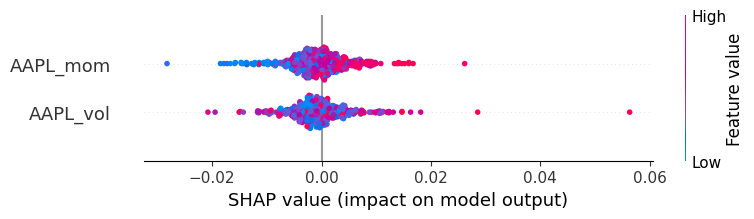

     Factor  Mean |SHAP|
0  AAPL_mom       0.0039
1  AAPL_vol       0.0036

=== SHAP 분석 시작: MSFT ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


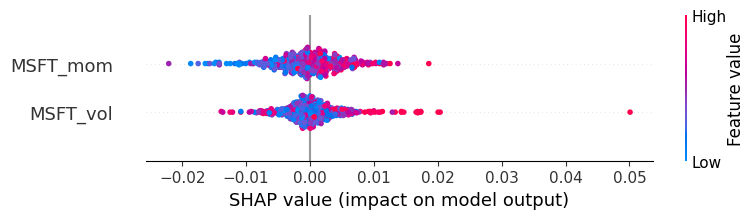

     Factor  Mean |SHAP|
0  MSFT_mom       0.0038
1  MSFT_vol       0.0032

=== SHAP 분석 시작: GOOGL ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


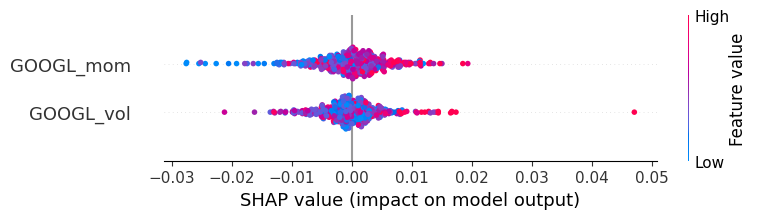

      Factor  Mean |SHAP|
0  GOOGL_mom       0.0043
1  GOOGL_vol       0.0035

=== SHAP 분석 시작: AMZN ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


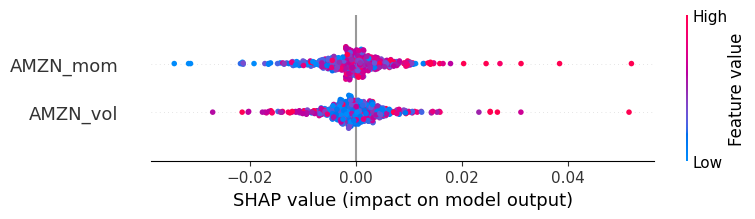

     Factor  Mean |SHAP|
0  AMZN_mom       0.0049
1  AMZN_vol       0.0044

=== SHAP 분석 시작: BTC-USD ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


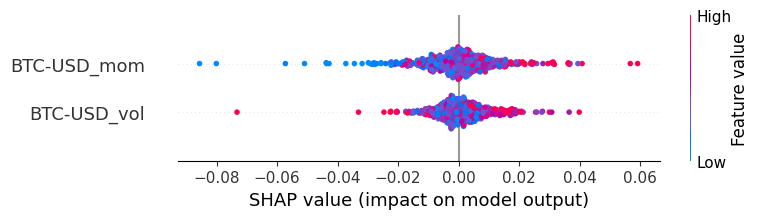

        Factor  Mean |SHAP|
0  BTC-USD_mom       0.0093
1  BTC-USD_vol       0.0067

=== SHAP 분석 시작: ETH-USD ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


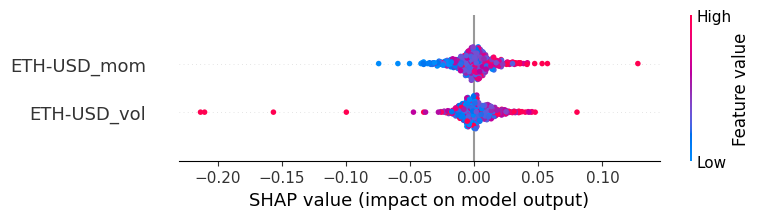

        Factor  Mean |SHAP|
0  ETH-USD_mom       0.0109
1  ETH-USD_vol       0.0109

=== SHAP 분석 시작: BNB-USD ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


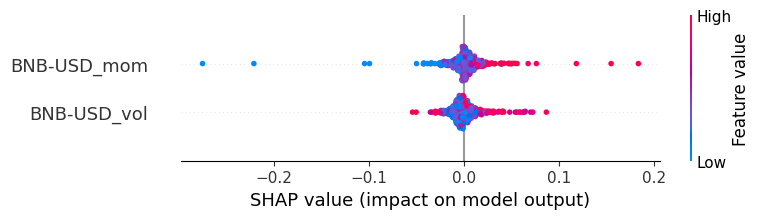

        Factor  Mean |SHAP|
0  BNB-USD_mom       0.0121
1  BNB-USD_vol       0.0096

=== SHAP 분석 시작: SOL-USD ===


/tmp/ipython-input-16-1220465760.py:34: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, plot_type="dot")


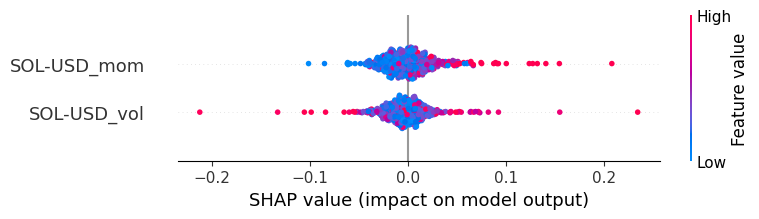

        Factor  Mean |SHAP|
0  SOL-USD_mom       0.0202
1  SOL-USD_vol       0.0170


In [17]:
price, returns, factors = fetch_data(mixed_assets)

for asset in mixed_assets:
    print(f"\n=== SHAP 분석 시작: {asset} ===")
    run_shap_feature_importance(factors=factors, returns=returns, target_asset=asset, sample_size=500)


In [18]:
#mixed_assets = ["AAPL", "MSFT", "GOOGL", "AMZN", "BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD"]
mixed_assets = ["AAPL", "MSFT"]
price, returns, factors = fetch_data(mixed_assets)

for asset in mixed_assets:
    run_shap_feature_importance_with_summary_flat(factors, returns, target_asset=asset)


NameError: name 'run_shap_feature_importance_with_summary_flat' is not defined

In [ ]:
def get_model_output_as_target(model, env_class, env_kwargs, date_index):
    """
    PPO 등 RL 모델에서 생성된 포트폴리오 수익률을 y 타깃으로 반환
    """
    import numpy as np
    from stable_baselines3.common.vec_env import DummyVecEnv

    # 환경 생성
    env = DummyVecEnv([lambda: env_class(**env_kwargs)])

    # 환경 초기화
    obs = env.reset()
    done = False
    daily_returns = []

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)

        # reward를 바로 사용해도 되지만, 포트폴리오 수익률을 얻고 싶으면 info 활용
        if isinstance(info, list):
            info = info[0]  # DummyVecEnv는 리스트 형태로 반환

        daily_return = info.get("daily_return", reward)
        daily_returns.append(daily_return)

    # SHAP 타깃 y로 반환 (DataFrame)
    y = pd.Series(daily_returns, index=date_index[:len(daily_returns)], name="PortfolioReturn")
    return y

def run_model_shap_analysis(factors, returns, price, reward_type, model_class, model_name):
    print(f"\n=== SHAP 분석 시작: {model_name} with reward = {reward_type} ===")

    # 환경 생성 인자
    env_kwargs = {
        "price": price,
        "returns": returns,
        "factors": factors,
    }

    # 환경 생성
    env = DummyVecEnv([lambda: PPOPortfolioEnv(**env_kwargs)])

    # 모델 로드 (확장자 .zip 제거)
    model_path = f"{model_name.lower()}_{reward_type}_model"
    model = model_class.load(model_path)

    # SHAP 타깃 생성
    y = get_model_output_as_target(model, PPOPortfolioEnv, env_kwargs, date_index=returns.index)

    # SHAP 실행
    mixed_assets = price.columns.tolist()
    for asset in mixed_assets:
        run_shap_feature_importance_with_summary_flat(factors, y, target_asset=asset)


In [ ]:
# 데이터 로딩
price, returns, factors = fetch_data(["AAPL", "MSFT"])

# 분석 수행
for reward_type in ["sharpe", "multi_beta", "multi_hybrid"]:
    run_model_shap_analysis(factors, returns, price, reward_type, PPO, model_name="PPO")


In [ ]:

for reward_type in ["sharpe", "multi_beta", "multi_hybrid"]:
    run_model_shap_analysis(factors, returns, reward_type=reward_type)

In [ ]:
for asset in mixed_assets:
    print(f"\n=== SHAP 분석 시작: {asset} ===")
    run_shap_feature_importance(factors=factors, returns=returns, target_asset=asset, sample_size=500)